# I. INTRODUCTION

**Data dictionary**

| No. | Column Name | Definition|Key|
|:-----|:-----|:-----|:-----|
1|Row ID|Unique identifier for each row in the dataset.|
2|Order ID|Unique identifier for each order transaction.|
3|Order Date|Date when the order was created.|
4|Ship Date|Date when the order was shipped to the customer.|
5|Ship Mode|Type of shipping used for each customer|Same Day, First Class, Second Class, Standard Class
6|Customer ID|Unique identifier for each customer.|
7|Customer Name|Full name of the customer who purchased the order.|
8|Segment|Customer segment classification.|Consumer, Corporate, Home Office
9|Country|Country where the order was created.|
10|City|The city where the customer is located.|
11|State|The state where the customer is located.|
12|Postal Code|The postal code for the customer's address.|
13|Region|The region where the customer is located.|South, West, Central, East
14|Retail Sales People|Name of the salesperson handling the transaction.|
15|Product ID|Unique identifier for the purchased product.|
16|Category|The main category to which the purchased item belongs.| Furniture, Office Supplies, Technology
17|Sub-Category|Sub-category under the product category.|
18|Product Name|Name of the product purchased.|
19|Returned|Indicates whether the product was returned or not.| Yes, No
20|Sales|Total sales amount for the order in US|
21|Quantity|Quantity of items purchased in the order.|
22|Discount|Discount percentage applied to the order.|
23|Profit|Profit amount for the order in USD.|


# II. DATA PREPARATION

## 1/ Import relevant libraries and dataset

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Import dataset
link = 'https://raw.githubusercontent.com/VyLe14072001/Final_Project/refs/heads/main/Retail-Supply-Chain-Sales-Dataset.csv'
df = pd.read_csv(link)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Retail Sales People,Product ID,Category,Sub-Category,Product Name,Returned,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,8/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,Not,261.96,2,0.00,41.91
1,2,CA-2016-152156,8/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Not,731.94,3,0.00,219.58
2,3,CA-2016-138688,12/6/2016,12/6/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Anna Andreadi,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Not,14.62,2,0.00,6.87
3,4,US-2015-108966,11/10/2015,11/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Not,957.58,5,0.45,-383.03
4,5,US-2015-108966,11/10/2015,11/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Not,22.37,2,0.20,2.52


## 2/ Overview of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Row ID               9994 non-null   int64  
 1   Order ID             9994 non-null   object 
 2   Order Date           9994 non-null   object 
 3   Ship Date            9994 non-null   object 
 4   Ship Mode            9994 non-null   object 
 5   Customer ID          9994 non-null   object 
 6   Customer Name        9994 non-null   object 
 7   Segment              9994 non-null   object 
 8   Country              9994 non-null   object 
 9   City                 9994 non-null   object 
 10  State                9994 non-null   object 
 11  Postal Code          9994 non-null   int64  
 12  Region               9994 non-null   object 
 13  Retail Sales People  9994 non-null   object 
 14  Product ID           9994 non-null   object 
 15  Category             9994 non-null   o

In [ ]:
# Check for the whole duplicated rows
df.duplicated().sum()

0

In [ ]:
# Check for null values
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


## 3/ Cleaning data

In [ ]:
# Drop unnecessary columns
df.drop(columns=['Row ID','Country','Postal Code'], inplace= True)

In [ ]:
# Rename the columns
df.rename(columns={'Segment':'Customer Segment', 'Category':'Product Category'}, inplace= True)

In [ ]:
# Convert the column 'Order Date' and 'Ship Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [ ]:
# Add new column called 'Shipping_time'
df['Shipping time'] = df['Ship Date'] - df['Order Date']
df['Shipping time'] = df['Shipping time'].astype('str')

def extract_number_day(time):
  return time.split(' ')[0]

df['Shipping time'] = df['Shipping time'].apply(extract_number_day).astype('int64')

In [ ]:
# Add new column called 'Profit Adjust'
def profit_adjust(data):
  if data['Returned'] == 'Yes' and data['Profit']>0:
    return 0
  else:
    return data['Profit']

df['Profit Adjust'] = df.apply(profit_adjust, axis=1)
df.drop(columns=['Profit'], inplace = True)

In [ ]:
# Add new column called 'Cost'
df['Cost'] = df['Sales'] - df['Profit Adjust']

In [ ]:
# Add new column called 'Is_Profit' and 'Profit Margin'
def is_profit(profit):
  if profit>0:
    return 'Yes'
  else:
    return 'No'
df['Is_Profit'] = df['Profit Adjust'].apply(is_profit)

df['Profit Margin'] = df['Profit Adjust'] / df['Sales'] * 100

In [ ]:
# Convert 'Yes'/'No' in "Returned" column to 1/0
df['Returned'] = df['Returned'].map({'Yes': 1, 'Not': 0})

In [ ]:
df.info()
# # Save the DataFrame to a CSV file
# file_name = 'final_project.csv'
# df.to_csv(file_name, index=False)

# # Download the CSV file
# from google.colab import files
# files.download(file_name)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order ID             9994 non-null   object        
 1   Order Date           9994 non-null   datetime64[ns]
 2   Ship Date            9994 non-null   datetime64[ns]
 3   Ship Mode            9994 non-null   object        
 4   Customer ID          9994 non-null   object        
 5   Customer Name        9994 non-null   object        
 6   Customer Segment     9994 non-null   object        
 7   City                 9994 non-null   object        
 8   State                9994 non-null   object        
 9   Region               9994 non-null   object        
 10  Retail Sales People  9994 non-null   object        
 11  Product ID           9994 non-null   object        
 12  Product Category     9994 non-null   object        
 13  Sub-Category         9994 non-nul

## 4/ Descriptive analysis

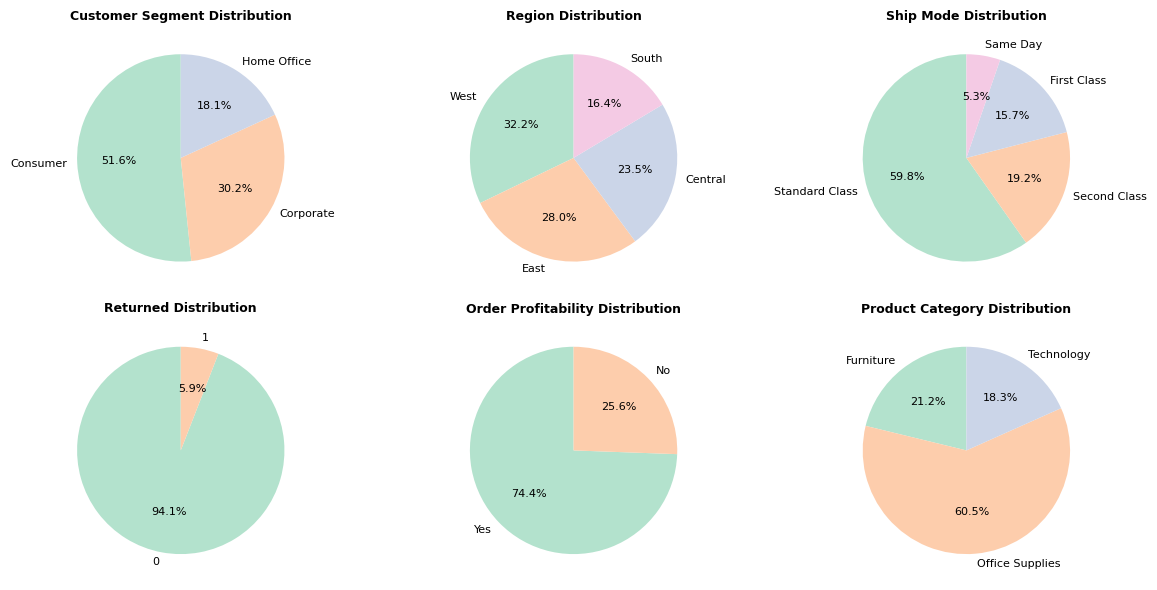

In [ ]:
# Category columns

plt.figure(figsize=(12,6))
for i, col in enumerate(['Customer Segment', 'Region', 'Ship Mode', 'Returned'], start=1):
  plt.subplot(2, 3, i)
  x = df.groupby('Order ID')[col].value_counts().reset_index()
  counts = x[col].value_counts()
  plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors,textprops={'fontsize':8})
  plt.title(f'{col} Distribution', fontsize=9, weight='bold')

plt.subplot(2,3,5)
profit_data = df.groupby('Order ID')['Profit Adjust'].sum().reset_index()
profit_data['Is_profit_orderID'] = profit_data['Profit Adjust'].apply(is_profit)
counts = profit_data['Is_profit_orderID'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors,textprops={'fontsize':8})
plt.title('Order Profitability Distribution', fontsize=9, weight='bold')

plt.subplot(2,3,6)
counts = df.groupby('Product Category')['Quantity'].sum()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors,textprops={'fontsize':8})
plt.title('Product Category Distribution', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

<ipython-input-16-89f9a6feaca7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=grouped_data, x=col, palette='Blues')
<ipython-input-16-89f9a6feaca7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=grouped_data, x=col, palette='Blues')
<ipython-input-16-89f9a6feaca7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Blues')
<ipython-input-16-89f9a6feaca7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend

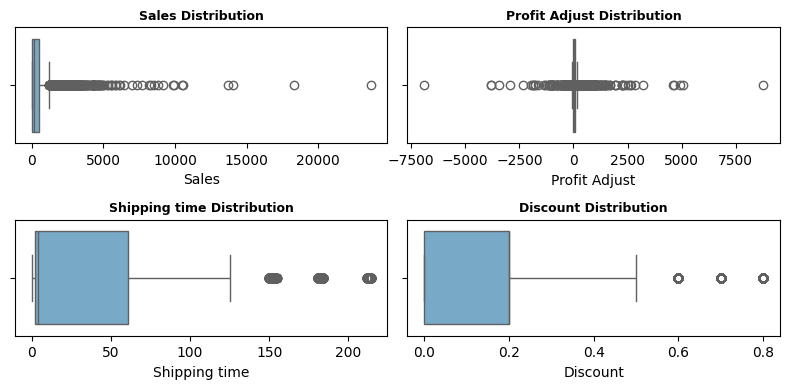

In [ ]:
# Numeric columns
numeric_columns1 = ['Sales', 'Profit Adjust']
numeric_columns2 = ['Shipping time', 'Discount']

plt.figure(figsize=(8,4))
for i, col in enumerate(numeric_columns1, start=1):
  plt.subplot(2, 2, i)
  grouped_data = df.groupby('Order ID')[col].sum().reset_index()
  sns.boxplot(data=grouped_data, x=col, palette='Blues')
  plt.title(f'{col} Distribution', fontsize=9, weight='bold')

for i, col in enumerate(numeric_columns2, start=3):
  plt.subplot(2, 2, i)
  sns.boxplot(x=df[col], palette='Blues')
  plt.title(f'{col} Distribution', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

In [ ]:
df[['Sales', 'Profit Adjust', 'Shipping time', 'Discount']].describe()

,Sales,Profit Adjust,Shipping time,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858022,25.074756,34.609065,0.156203
std,623.245131,223.115257,55.058389,0.206452
min,0.440000,-6599.980000,0.000000,0.000000
25%,17.280000,0.000000,2.000000,0.000000
50%,54.490000,6.790000,4.000000,0.200000
75%,209.940000,25.492500,61.000000,0.200000
max,22638.480000,8399.980000,214.000000,0.800000


In [ ]:
# Correlations among Key Variables
df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,Returned,Sales,Quantity,Discount,Shipping time,Profit Adjust,Cost,Profit Margin
Returned,1.000000,-0.002001,0.003537,-0.018258,-0.017147,-0.053925,0.019041,-0.127172
Sales,-0.002001,1.000000,0.200795,-0.028190,-0.002772,0.422303,0.934069,0.006775
Quantity,0.003537,0.200795,1.000000,0.008623,0.002160,0.062140,0.196482,-0.005349
Discount,-0.018258,-0.028190,0.008623,1.000000,0.006536,-0.222700,0.056710,-0.849828
Shipping time,-0.017147,-0.002772,0.002160,0.006536,1.000000,0.011651,-0.007640,-0.004291
Profit Adjust,-0.053925,0.422303,0.062140,-0.222700,0.011651,1.000000,0.070772,0.233755
Cost,0.019041,0.934069,0.196482,0.056710,-0.007640,0.070772,1.000000,-0.084631
Profit Margin,-0.127172,0.006775,-0.005349,-0.849828,-0.004291,0.233755,-0.084631,1.000000


# III. EXPLORATORY DATA ANALYSIS

## 1/ Overview

In [ ]:
# Overview dataset 2014 - 2017
display.IFrame(src="https://public.tableau.com/views/FinalProject_09_03_2025/OVERVIEW?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link:showVizHome=no&:embed=true",width=600, height=650)

In [ ]:
# Total Sales by Year
display.IFrame(src="https://public.tableau.com/views/FinalProject_09_03_2025/OVERVIEW1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link:showVizHome=no&:embed=true",
               width=600, height=500)

## 2/ Time-Series

In [ ]:
# Total Sales by Quarter and Month
display.IFrame(src="https://public.tableau.com/views/FinalProject_09_03_2025/BROKENSALES?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link:showVizHome=no&:embed=true",
               width=750, height=550)

In [ ]:
# Total Profit by Quarter and Month
display.IFrame(src="https://public.tableau.com/views/FinalProject_09_03_2025/BROKENPROFIT?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link:showVizHome=no&:embed=true",
               width=750, height=550)

In [ ]:
# Total Sales and Profit by Region
display.IFrame(src="https://public.tableau.com/views/FinalProject_09_03_2025/OVERVIEWREGION?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link:showVizHome=no&:embed=true",
               width=700, height=750)

In [ ]:
# Weekly Sales Trends Over The Years
display.IFrame(src="https://public.tableau.com/views/FinalProject_09_03_2025/WEEKLYSALES_YEAR?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link:showVizHome=no&:embed=true",
               width=600, height=500)

In [ ]:
# Weekly Sales Trends by Customer Segment
display.IFrame(src="https://public.tableau.com/views/FinalProject_09_03_2025/WEEKLYSALES_CUS_SEG?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link:showVizHome=no&:embed=true",
               width=600, height=500)

## 3/ Profitability

In [ ]:
# Negative Profit Breakdown by Region and Product Category
display.IFrame(src="https://public.tableau.com/views/FinalProject_09_03_2025/NPRegion?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link:showVizHome=no&:embed=true",
               width=500, height=400)

In [ ]:
# Region and Customer Segment breakdown
display.IFrame(src="https://public.tableau.com/views/FinalProject_09_03_2025/DETAIL-REGIONCUSTOMERPRO-SUBCATE?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link:showVizHome=no&:embed=true",
               width=950, height=600)

In [ ]:
# Sub-Categpory Product breakdown
display.IFrame(src="https://public.tableau.com/views/FinalProject_09_03_2025/PROCATE?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link:showVizHome=no&:embed=true",
               width=1000, height=530)

# IV. PERFORMANCE ANALYSIS


## 1/ Factors affecting low profit margin

### 1.1/ Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

x = df[['Discount']]
y = df['Profit Margin']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(xtrain,ytrain)

print(f"Coef: {lr.coef_}")
print(f"Intercept: {lr.intercept_}")

y_pred = lr.predict(xtest)
print("Mean Absolute Error:", metrics.mean_absolute_error(ytest, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(ytest, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

X2 = sm.add_constant(xtrain)
model_stats = sm.OLS(ytrain.values.reshape(-1, 1), X2).fit()
model_stats.summary()

Coef: [-189.84308855]
Intercept: 39.83816459479519
Mean Absolute Error: 17.87273681188111
Mean Squared Error: 607.0924760732668
Root Mean Squared Error: 24.63924666204847


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 2.070e+04
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        07:06:02   Log-Likelihood:                -36880.
No. Observations:                7995   AIC:                         7.376e+04
Df Residuals:                    7993   BIC:                         7.378e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8382      0.342    116.384      0.000      39.167      40.509
Discount    -189.8431      1.319   -143.890      0.000    -192.429    -187.257
==============================================================================
Omnibus:                     2859.175   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19239.844
Skew:                          -1.552   Prob(JB):                         0.00
Kurtosis:                       9.937   Cond. No.                         4.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1.2/ Scatter Plot

Text(0.5, 1.0, 'Correlation between Discount and Sales')

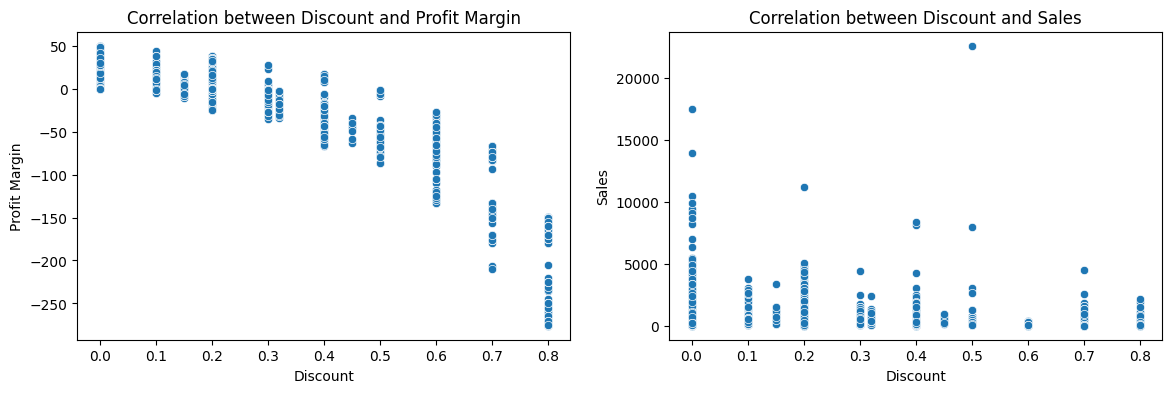

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.scatterplot(x='Discount', y='Profit Margin', data=df)
plt.title('Correlation between Discount and Profit Margin')

plt.subplot(1,2,2)
sns.scatterplot(x='Discount', y='Sales', data=df)
plt.title('Correlation between Discount and Sales')

### 1.3/ Solution

In [ ]:
def remove_outliers(df, column, threshold=1.5):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - threshold * IQR
  upper_bound = Q3 + threshold * IQR
  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def Optimal_Discount_test(name, chart_name, df):
  # Filter data & remove outliers
  filtered_df = df[df['Sub-Category'].isin(name)][['Discount', 'Profit Margin']]
  filtered_df = remove_outliers(filtered_df, 'Profit Margin')

  discounts = filtered_df['Discount'].values.reshape(-1, 1)
  profits = filtered_df['Profit Margin'].values

  # Visualize
  plt.scatter(discounts, profits, alpha=0.6)
  plt.title(f'Discount vs Profit Margin of {chart_name}')
  plt.xlabel('Discount')
  plt.ylabel('Profit Margin')
  plt.show()

  # Determine best polynomial degree
  best_degree = max(range(2, 6), key=lambda d: np.mean(cross_val_score(
      LinearRegression(),
      PolynomialFeatures(degree=d).fit_transform(discounts),
      profits, cv=5, scoring='r2')))
  print(f"Best polynomial degree: {best_degree}")

  poly = PolynomialFeatures(degree=best_degree)
  X_poly = poly.fit_transform(discounts)
  model = LinearRegression().fit(X_poly, profits)

  r2_score = model.score(X_poly, profits)
  print(f"R² score: {r2_score:.4f}")

  coefficients = np.concatenate(([model.intercept_], model.coef_[1:]))
  poly_eq = np.poly1d(np.flip(coefficients))
  poly_derivative = poly_eq.deriv()

  # Set discount range within 5%-30%
  discount_min, discount_max = 0.05, 0.30

  # Find critical points
  critical_points = [p.real for p in np.roots(poly_derivative) if discount_min <= p <= discount_max and np.isreal(p)]

  if not critical_points:
      print("No valid critical points found within range. Evaluating at boundaries.")
      critical_points = [discount_min, discount_max]

  profits_at_critical = model.predict(poly.transform(np.array(critical_points).reshape(-1, 1)))
  optimal_idx = np.argmax(profits_at_critical)
  optimal_discount = critical_points[optimal_idx]

  print(f'Optimal Discount: {optimal_discount * 100:.2f}%')
  print(f'Optimal Profit: {profits_at_critical[optimal_idx]:.2f}')

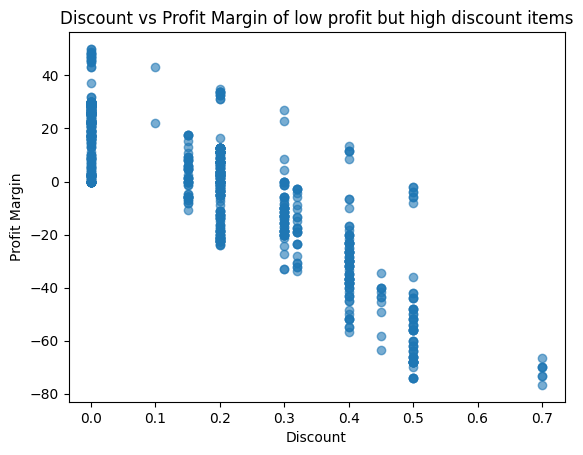

Best polynomial degree: 4
R² score: 0.7598
No valid critical points found within range. Evaluating at boundaries.
Optimal Discount: 5.00%
Optimal Profit: 13.21


In [ ]:
# Slow Profit Margin or Discount greater than 20%: Bookcases, Supplies, Tables, Machines
Optimal_Discount_test(['Bookcases', 'Supplies', 'Tables', 'Machines'], 'low profit but high discount items',df)

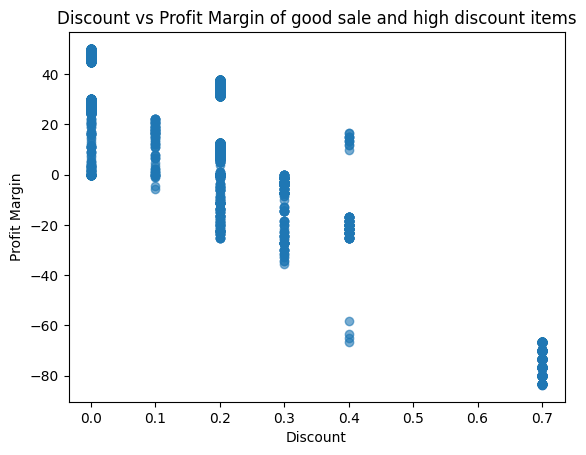

Best polynomial degree: 5
R² score: 0.8481
Optimal Discount: 16.53%
Optimal Profit: 19.14


In [ ]:
# Good Sales + Discount ~ 15-20%: Phones, Chairs, Binders
Optimal_Discount_test(['Phones','Chairs','Binders'], 'good sale and high discount items', df)

## 2/ Customer Behaviours

### 2.1/ Cohort analysis

<Axes: xlabel='CohortIndex', ylabel='CohortQuarterID'>

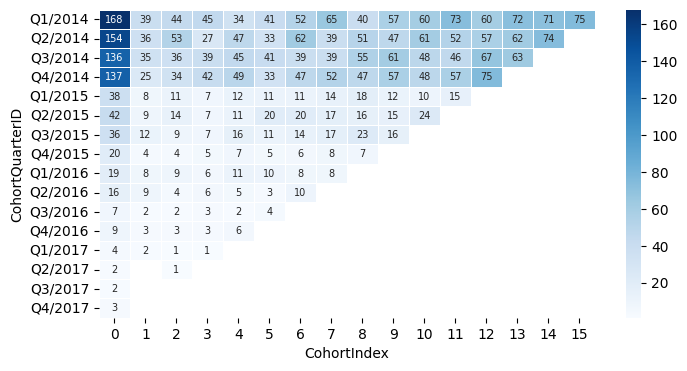

In [ ]:
import datetime as dt

data = df.copy()
data['OrderQuarter'] = 'Q' + data['Order Date'].dt.quarter.astype('str') + '/' + data['Order Date'].dt.year.astype('str')
sorted_quarters = sorted(data['OrderQuarter'].unique(), key = lambda x : (int(x.split('/')[1]), x.split('/')[0]))
quarter_map = dict(zip(sorted_quarters, range(len(sorted_quarters))))
data['OrderQuarterID'] = data['OrderQuarter'].map(quarter_map)

data['CohortQuarterID'] = data.groupby('Customer ID')['OrderQuarterID'].transform('min')
data['CohortQuarter'] = data['CohortQuarterID'].map(dict(zip(quarter_map.values(), quarter_map.keys())))
data['CohortIndex'] = data['OrderQuarterID'] - data['CohortQuarterID']

retention = data.groupby(['CohortQuarterID','CohortIndex'])['Customer ID'].apply(pd.Series.nunique).reset_index()
retention.rename(columns={'Customer ID': 'Customer Count'}, inplace=True)

retention2 = retention.pivot_table(index='CohortQuarterID',
                                   columns='CohortIndex',
                                   values='Customer Count')
retention2.index = retention2.index.map(dict(zip(quarter_map.values(), quarter_map.keys())))

plt.figure(figsize=(8,4))
sns.heatmap(retention2, annot=True, fmt="g", annot_kws={'size': 7}, cmap='Blues', linewidths=0.5)

<Axes: xlabel='CohortIndex', ylabel='CohortQuarterID'>

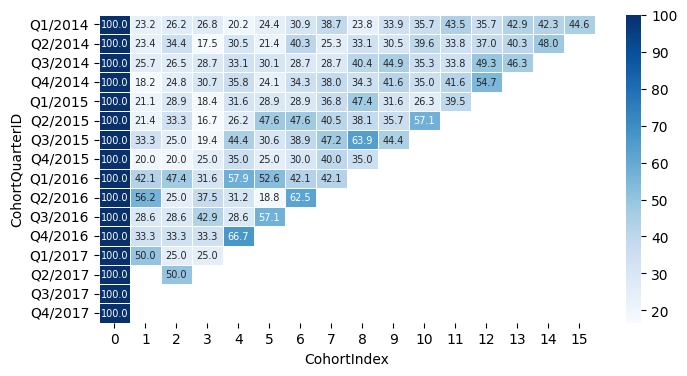

In [ ]:
size  = retention2.iloc[:,0]
retention3 = retention2.divide(size, axis=0)
retention3 = (retention3*100).round(2)

plt.figure(figsize=(8,4))
sns.heatmap(retention3, annot=True, fmt='.1f', annot_kws={'size': 7}, cmap='Blues', linewidths=0.5)

### 2.2/ RFM

In [ ]:
recency = df.groupby('Customer ID')['Order Date'].max().reset_index()
recency.columns = ['Customer ID', 'LastPurchaseDate']
recent_date = recency['LastPurchaseDate'].max()
recency['Recency'] = recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

frequency = df.groupby('Customer ID').size().reset_index().rename(columns={0:"Frequency"})

monetary = df.groupby('Customer ID')['Sales'].sum().reset_index().rename(columns={'Sales':'Monetary'})

RFM = pd.merge(recency[['Customer ID','Recency']], frequency, on = 'Customer ID')
RFM = pd.merge(RFM, monetary, on='Customer ID')

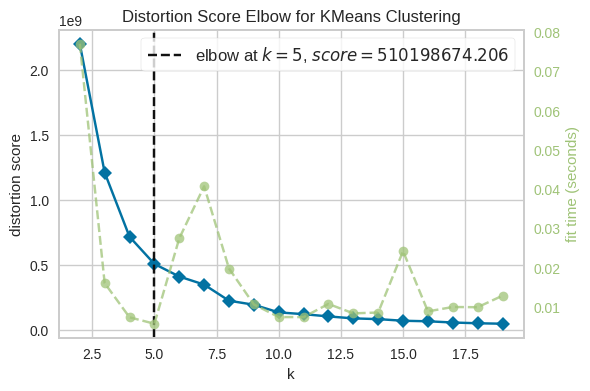

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

RFM2 = RFM.drop(columns=['Customer ID'])
k_means = KMeans(random_state=42)

plt.figure(figsize=(6, 4))
elbow = KElbowVisualizer(k_means, k=(2, 20))
elbow.fit(RFM2)
elbow.show()

In [ ]:
kmeans= KMeans(n_clusters=elbow.elbow_value_, random_state=42)
kmeans.fit(RFM2)

KMeans(n_clusters=5, random_state=42)

In [ ]:
RFM2['Cluster']= kmeans.labels_
RFM2.head()

,Recency,Frequency,Monetary,Cluster
0,184,11,5563.56,2
1,48,15,1056.39,4
2,259,12,1790.51,4
3,233,18,5086.94,2
4,445,6,886.15,4


In [ ]:
def rfm_clusters_statistics(df):
  df_new = df.groupby(['Cluster']).agg({
      'Recency'  : ['mean','median', 'min', 'max'],
      'Frequency': ['mean','median', 'min', 'max'],
      'Monetary' : ['mean','median', 'min', 'max', 'count']
                                        }).round(0)
  return df_new

RFM['Cluster'] = kmeans.labels_
RFM.head()

,Customer ID,Recency,Frequency,Monetary,Cluster
0,AA-10315,184,11,5563.56,2
1,AA-10375,48,15,1056.39,4
2,AA-10480,259,12,1790.51,4
3,AA-10645,233,18,5086.94,2
4,AB-10015,445,6,886.15,4


<ipython-input-41-21329063dfaa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(1,3,i); sns.distplot(RFM[name])
<ipython-input-41-21329063dfaa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(1,3,i); sns.distplot(RFM[name])
<ipython-input-41-21329063dfaa>:3: UserWarning: 

`distplot` is a deprec

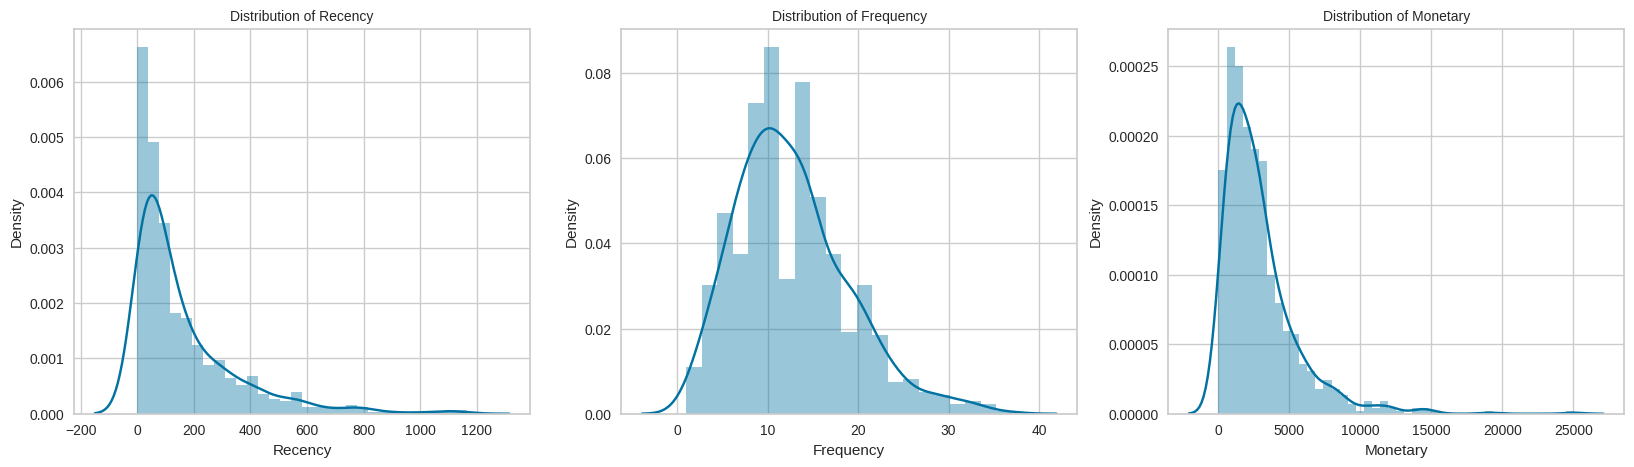

In [ ]:
plt.figure(figsize=(20,5))
for i, name in enumerate(['Recency', 'Frequency', 'Monetary'], start=1):
  plt.subplot(1,3,i); sns.distplot(RFM[name])
  plt.title(f'Distribution of {name}', fontsize=10)

In [ ]:
RFM_statistics= rfm_clusters_statistics(RFM)
RFM_statistics.style.background_gradient(cmap='Blues')

In [ ]:
pip install squarify

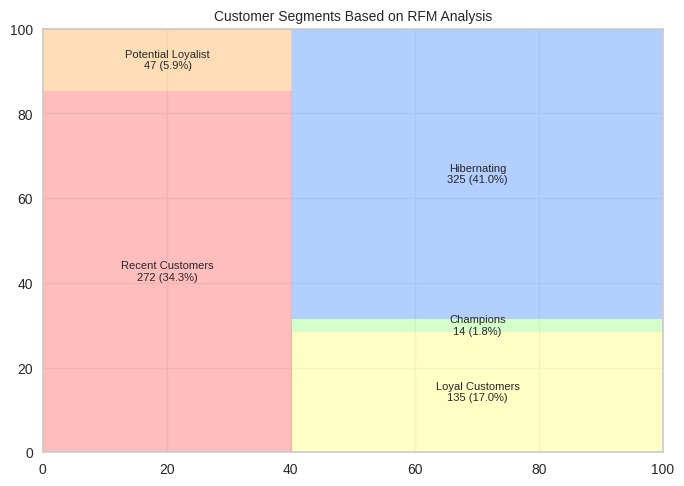

In [ ]:
import squarify

clusters = ['Recent Customers', 'Potential Loyalist', 'Loyal Customers', 'Champions', 'Hibernating']
counts = [272, 47, 135, 14, 325]

total_customers = sum(counts)
percentages = [(count / total_customers) * 100 for count in counts]
labels = [f'{clusters[i]}\n{counts[i]} ({percentages[i]:.1f}%)' for i in range(len(clusters))]

squarify.plot(sizes=counts,
              label=labels,
              color=['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#a0c4ff'],
              alpha=0.8,
              text_kwargs={'fontsize': 8})
plt.title('Customer Segments Based on RFM Analysis', fontsize=10)
plt.show()

### 2.3/ Customer Segment Profiles

In [ ]:
def cluster(column, k):
  if column in ['Product Category', 'Sub-Category']:
    dt1_1 = df.groupby(['Customer ID', column]).agg(Sales=('Sales', 'sum'),
                                                    Profit=('Profit Adjust', 'sum')).reset_index()
    dt1_2 = pd.merge(dt1_1, RFM[['Customer ID', 'Cluster']], on='Customer ID')
    final = dt1_2.query('Cluster == @k').groupby(column)[['Sales', 'Profit']].sum().reset_index()
    final['%Sales'] = round(final['Sales']/final['Sales'].sum() *100,1)
  else:
    dt1_1 = df.groupby(['Customer ID', column]).agg(Sales=('Sales', 'sum'),
                                                    Profit=('Profit Adjust', 'sum')).reset_index()
    dt1_2 = pd.merge(dt1_1, RFM[['Customer ID', 'Cluster']], on='Customer ID')
    dt1_3 = dt1_2.query('Cluster == @k').groupby(column)[['Sales', 'Profit']].sum().reset_index()
    dt2_1 = pd.merge(df[['Customer ID', column]].drop_duplicates(subset=['Customer ID']),
                     RFM[['Customer ID', 'Cluster']], on='Customer ID')
    dt2_2 = dt2_1.query('Cluster == @k').groupby(column)['Customer ID'].nunique().reset_index(name='No.Customers')
    final = pd.merge(dt2_2, dt1_3, on=column)
    final['%Customer'] = round(final['No.Customers']/final['No.Customers'].sum() *100,1)
    final['%Sales'] = round(final['Sales']/final['Sales'].sum() *100,1)
  return final.style.background_gradient(cmap='Blues')

In [ ]:
cluster('Product Category', 4)

,Product Category,Sales,Profit,%Sales
0,Furniture,105661.270000,-3068.390000,34.100000
1,Office Supplies,121037.430000,18794.460000,39.000000
2,Technology,83318.440000,12271.380000,26.900000


In [ ]:
cluster('Sub-Category',4)

,Sub-Category,Sales,Profit,%Sales
0,Accessories,27008.260000,5713.570000,8.700000
1,Appliances,16742.220000,2596.930000,5.400000
2,Art,7952.480000,1791.660000,2.600000
3,Binders,20592.050000,-513.160000,6.600000
4,Bookcases,20535.790000,-2546.840000,6.600000
5,Chairs,41394.090000,2020.200000,13.400000
6,Copiers,3879.870000,971.980000,1.300000
7,Envelopes,5848.860000,2315.110000,1.900000
8,Fasteners,975.250000,247.020000,0.300000
9,Furnishings,19997.910000,1721.340000,6.500000


In [ ]:
cluster('Region',1)

,Region,No.Customers,Sales,Profit,%Customer,%Sales
0,Central,10,67689.580000,5352.030000,21.300000,17.400000
1,East,14,124022.110000,24379.990000,29.800000,31.900000
2,South,9,79340.210000,5066.880000,19.100000,20.400000
3,West,14,118059.620000,17539.370000,29.800000,30.300000


In [ ]:
cluster('Customer Segment',4)

,Customer Segment,No.Customers,Sales,Profit,%Customer,%Sales
0,Consumer,172,160573.980000,15863.850000,52.900000,51.800000
1,Corporate,85,82364.830000,5546.030000,26.200000,26.600000
2,Home Office,68,67078.330000,6587.570000,20.900000,21.600000


In [ ]:
# Engagement time
cluster_profile = pd.merge(df.copy(), RFM[['Customer ID', 'Cluster']], on = 'Customer ID')
engagement_time = cluster_profile.groupby(["Customer ID", "Cluster"])["Order Date"].agg(First_Order='min', Last_Order='max').reset_index()
engagement_time["Engagement_Time_Days"] = (engagement_time["Last_Order"] - engagement_time["First_Order"]).dt.days
engagement_time.groupby("Cluster")["Engagement_Time_Days"].median().reset_index()

,Cluster,Engagement_Time_Days
0,0,1108.0
1,1,1125.0
2,2,1143.0
3,3,1097.0
4,4,1007.0


### 2.4/ Impact of Product Returns on Customer Retention

In [ ]:
# Number of customers who returned products at least once.
x = df[df['Returned']==1]['Customer ID'].unique().tolist()
len(x)

247

In [ ]:
# Number of customers whose latest order has a 'Returned' status.
returned_data = df[df['Customer ID'].isin(x)][['Customer ID', 'Order Date', 'Returned']]
returned_data = returned_data.sort_values(by='Order Date', ascending=False)
latest_return_data = returned_data.groupby('Customer ID').first().reset_index()
latest_return_data = latest_return_data[latest_return_data['Returned']== 1]
latest_return_data.shape[0]

57

In [ ]:
# Percentage of customers whose latest order has a 'Returned' status.
round(latest_return_data.shape[0]/len(x) *100,1)

23.1

In [ ]:
# For customers whose last order has a "Returned" status, calculate the average time between two purchases.
# If the time since the last 2 orders is greater than the average time between purchases,
# identify the group of customers who are likely to choose to another shop.

time_data = df[df['Customer ID'].isin(latest_return_data['Customer ID'].unique().tolist())][['Customer ID', 'Order Date', 'Returned']]
time_data = time_data[['Customer ID', 'Order Date']].drop_duplicates()
time_data = time_data.sort_values(by=['Customer ID', 'Order Date'])
time_data['Time Diff'] = time_data.groupby('Customer ID')['Order Date'].diff().dt.days

last_purchase_time = time_data.groupby('Customer ID')['Time Diff'].last().reset_index()
last_purchase_time.rename(columns={'Time Diff': 'Last Time Diff'}, inplace=True)

avg_purchase_time = time_data.groupby('Customer ID')['Time Diff'].median().reset_index()
avg_purchase_time.rename(columns={'Time Diff': 'Median Time Diff'}, inplace=True)

final_data = pd.merge(last_purchase_time, avg_purchase_time, on='Customer ID')
final_data['Churn Risk Customer'] = final_data['Last Time Diff'] - final_data['Median Time Diff']

final_data.head()

,Customer ID,Last Time Diff,Median Time Diff,Churn Risk Customer
0,AA-10645,397.0,161.0,236.0
1,AC-10450,284.0,166.5,117.5
2,AJ-10795,203.0,212.5,-9.5
3,AY-10555,363.0,363.0,0.0
4,BD-11725,121.0,121.0,0.0


In [ ]:
final_data[final_data['Churn Risk Customer']>0].shape

(18, 4)

In [ ]:
final_data[final_data['Churn Risk Customer']>0]

,Customer ID,Last Time Diff,Median Time Diff,Churn Risk Customer
0,AA-10645,397.0,161.0,236.0
1,AC-10450,284.0,166.5,117.5
10,BT-11305,403.0,229.0,174.0
11,BT-11395,288.0,172.0,116.0
14,CC-12670,157.0,121.0,36.0
17,CR-12625,755.0,492.0,263.0
20,DE-13255,404.0,199.0,205.0
21,DH-13075,277.0,85.0,192.0
23,EB-13975,446.0,100.0,346.0
24,EJ-13720,568.0,323.0,245.0


In [ ]:
d1 = final_data[final_data['Churn Risk Customer']>0]
d2 = df[df['Customer ID'].isin(d1['Customer ID'].to_list())]['Sales'].sum()
total_sale = df['Sales'].sum()
round(d2/total_sale *100,2)
# Churn risk customers contribute minimally to sales, and their loss won't significantly impact revenue.

2.39

### 2.5/ Basket Market Analysis

In [ ]:
from mlxtend.preprocessing import  TransactionEncoder
from mlxtend.frequent_patterns import association_rules,apriori

order_list = []
for i in df['Order ID'].unique():
  olist = list(set(df[df['Order ID'] == i]['Sub-Category']))
  if len(olist)>0:
    order_list.append(olist)

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(order_list).transform(order_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric= 'lift', min_threshold=1)
rules.sort_values('confidence', ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
30,"(Paper, Phones)",(Binders),0.034937,0.262727,0.010781,0.308571,1.174494,1.0,0.001602,1.066304,0.153948,0.037578,0.062181,0.174802
37,"(Paper, Storage)",(Binders),0.035536,0.262727,0.010581,0.297753,1.133316,1.0,0.001245,1.049877,0.121968,0.036780,0.047507,0.169013
10,(Fasteners),(Binders),0.042923,0.262727,0.012378,0.288372,1.097611,1.0,0.001101,1.036037,0.092919,0.042206,0.034784,0.167742
0,(Appliances),(Binders),0.090038,0.262727,0.025953,0.288248,1.097140,1.0,0.002298,1.035857,0.097300,0.079414,0.034616,0.193516
24,"(Paper, Furnishings)",(Binders),0.035336,0.262727,0.010182,0.288136,1.096711,1.0,0.000898,1.035693,0.091413,0.035368,0.034463,0.163445
12,(Fasteners),(Paper),0.042923,0.237772,0.011779,0.274419,1.154125,1.0,0.001573,1.050507,0.139532,0.043801,0.048078,0.161978
32,"(Phones, Binders)",(Paper),0.039728,0.237772,0.010781,0.271357,1.141248,1.0,0.001334,1.046092,0.128887,0.040419,0.044061,0.158348
38,"(Binders, Storage)",(Paper),0.039728,0.237772,0.010581,0.266332,1.120114,1.0,0.001135,1.038927,0.111670,0.039641,0.037469,0.155416
26,"(Furnishings, Binders)",(Paper),0.039529,0.237772,0.010182,0.257576,1.083289,1.0,0.000783,1.026674,0.080049,0.038117,0.025981,0.150198
4,(Appliances),(Paper),0.090038,0.237772,0.021761,0.241685,1.016458,1.0,0.000352,1.005160,0.017793,0.071102,0.005134,0.166602


# V. Conclusion
**Time - Series**
*   The East and West regions drive sales growth, while the Central region shows potential. The South remains stable but has limited growth opportunities.
*   Sales decline from Monday to Wednesday and peak on Friday across years and segments.
*   Consumers lead sales, whereas corporate sales decline on weekends.

**Factors affecting low profit margin**
*   The discount rate is a dominant factor affecting profitability.
  - 20% Discount→ Safe Boundary
  - 40% Discount→ Risky Threshold
*   Products requiring discount rate adjustment:
  - Group 1 - Low Margin or High Discount (>20%): Tables, Supplies, Bookcases, and Machines.
  - Group 2 - High Sales and High Discount (15-30%): Phones, Chairs, and Binders.
*   Optimal discount rate adjustments:
  - Group 1: 5%
  - Group 2: 16.53%
*   The return rate does not strongly influence profit margin.
*   Products with a high return rate include Copiers, Furnishings, Paper, and Appliances.

**Customer Behaviour**
*   The company effectively retains existing customers but struggles to acquire new ones.
*   60% of revenue comes from the Recent Customers and Loyal Customers segments.
*   Technology is the dominant product category across most customer segments, especially among Champions.
*   Popular product combinations:
  - Phones - Binders & Paper
  - Storage - Binders & Paper